# libraries #

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn import tree

# Reading dataset #

In [4]:

df=pd.read_csv('Telco Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# the last rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# The information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Describtion about dataset
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
# Types
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
# null values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
# the shape of dataframe
df.shape

(7043, 21)

# Data Wrangling

The column of customerID is not important so i will drop it

In [11]:

df.drop('customerID',axis=1,inplace=True)
df.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [12]:
df['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


 Number of null values in totalcharges column


In [13]:
len(df[df['TotalCharges']==" "])

11

Converting the type of totalcharges column

In [14]:

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [15]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
len(df[df['TotalCharges']==" "])

0

In [16]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [17]:
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn'].value_counts()# imbalance

,count
Churn,
0,5174
1,1869


In [18]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [19]:
categorical=list(df.select_dtypes(include=['object']).columns)
numerical=list(df.select_dtypes(include=['number']).columns)

In [20]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [21]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Removing Churn column from numerical

In [22]:

numerical.remove('Churn')

### calculating features importance

In [23]:
# calculate the feature impotance
global_mean=df['Churn'].mean()
round(global_mean,2)

np.float64(0.27)

Gender


In [24]:
churn_gender=df.groupby('gender').Churn.mean()
gender_risk= churn_gender/global_mean
gender_risk
# The differance between rates is small so gender is not important feature

,Churn
gender,
Female,1.014466
Male,0.985807


partner

In [25]:
churn_partner=df.groupby('Partner').Churn.mean()
partner_risk= churn_partner/global_mean
partner_risk
# The differance between rates is not small so Partner is important feature

,Churn
Partner,
No,1.241964
Yes,0.741038


In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [27]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [28]:
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df[numerical].head()


,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


# EDA #

<Axes: >

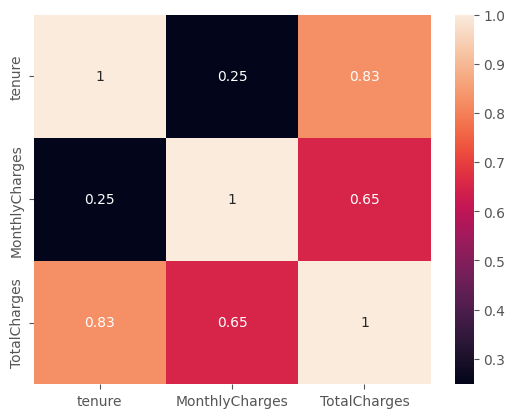

In [29]:
corr_num=df[numerical].corr()
sns.heatmap(corr_num,annot=True)

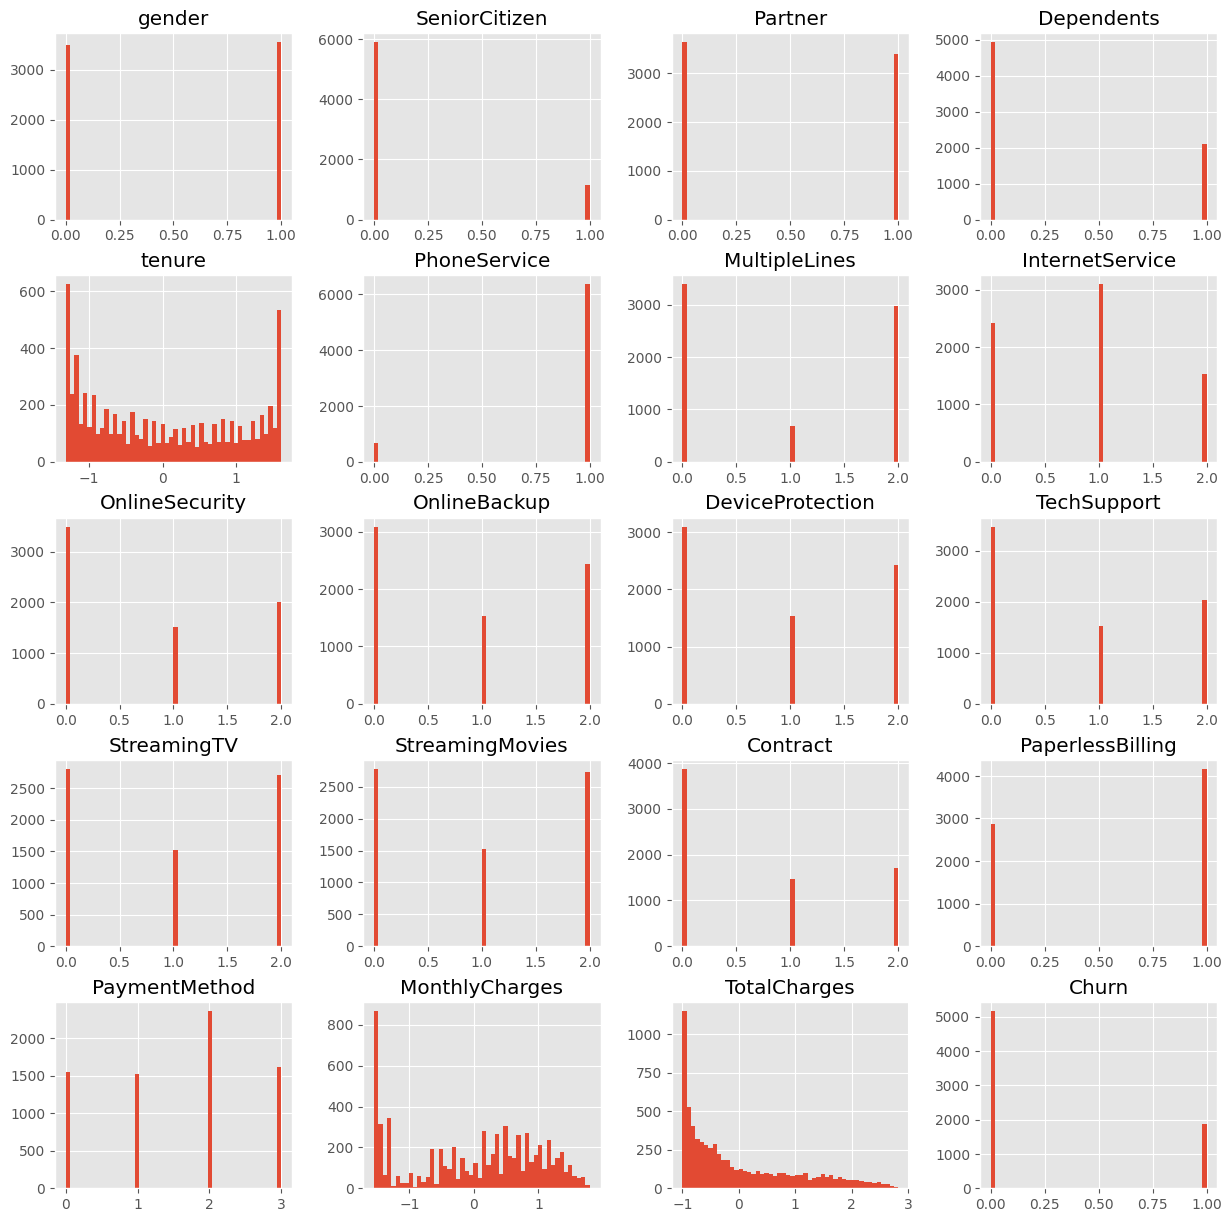

In [30]:
df.hist(bins=50,figsize=(15,15))
plt.show()

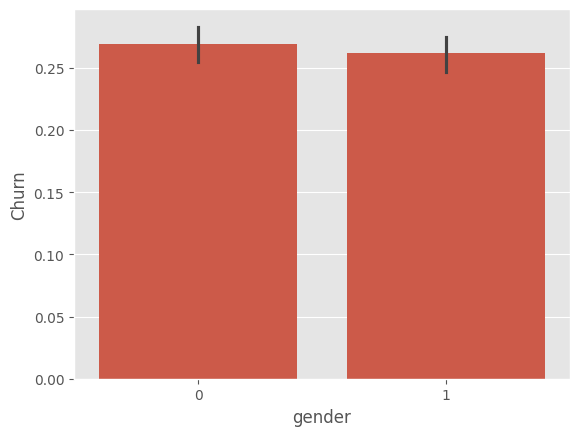

In [31]:
sns.barplot(data=df,x=df['gender'],y=df['Churn'])
plt.show()

<Axes: title={'center': 'Correlation with Churn '}>

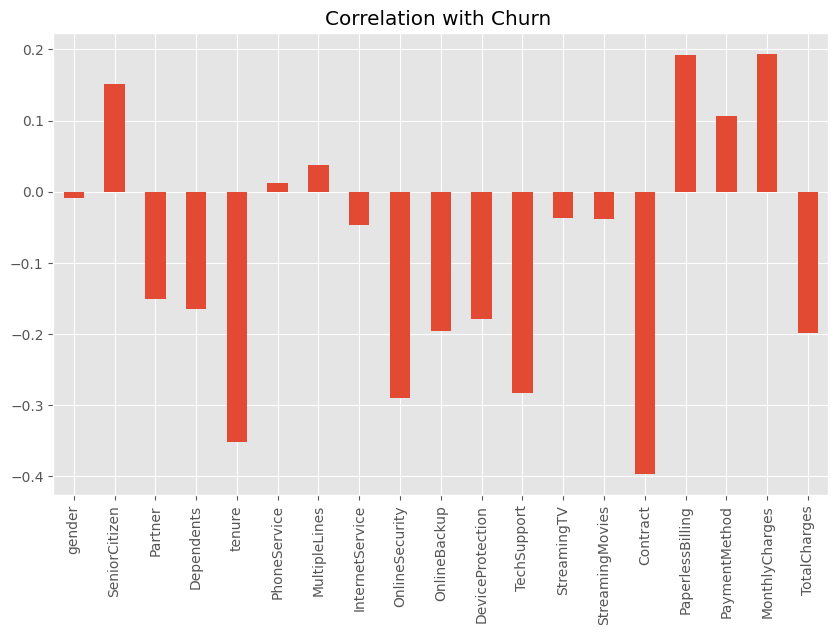

In [32]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Churn ")

# splitting dataset #

In [33]:
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [34]:
y.value_counts()# imbalance

,count
Churn,
0,5174
1,1869


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (5282, 19)
the shape of x_test is : (1761, 19)
the shape of y_tain is : (5282,)
the shape of y_test is (1761,)


# models #

LGBMClassifier

In [36]:
l=LGBMClassifier()
model=l.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 1406, number of negative: 3876
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266187 -> initscore=-1.014055
[LightGBM] [Info] Start training from score -1.014055
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.65      0.52      0.57       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



DecisionTreeClassifier

In [37]:
dt=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model2=dt.fit(x_train,y_train)
y_pred=model2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1298
           1       0.63      0.35      0.45       463

    accuracy                           0.78      1761
   macro avg       0.72      0.64      0.65      1761
weighted avg       0.76      0.78      0.75      1761



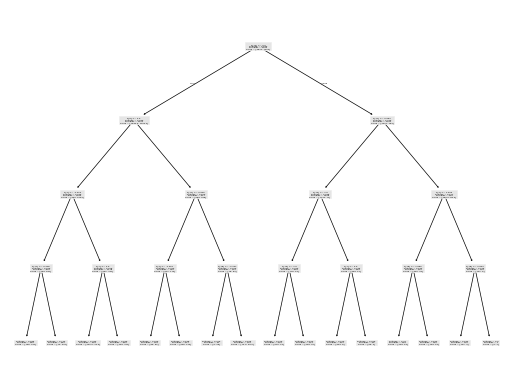

In [38]:
tree.plot_tree(model2)
plt.show()

LogisticRegression

In [39]:
lr=LogisticRegression()
model3=lr.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.65      0.52      0.57       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [40]:
!pip install shap imbalanced-learn xgboost

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Define X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Split the data (Stratified split is better for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training shape: {y_train.value_counts()}")
print(f"Resampled training shape: {y_train_resampled.value_counts()}")

Original training shape: Churn
0    4139
1    1495
Name: count, dtype: int64
Resampled training shape: Churn
0    4139
1    4139
Name: count, dtype: int64


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report

# Initialize XGBoost with tuned hyperparameters (typical starting point for Churn)
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=1  # SMOTE handled imbalance, so we can keep this as 1
)

# Fit the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate to confirm your target metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7480482611781405
Recall: 0.7727272727272727
ROC-AUC: 0.839836988813971

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



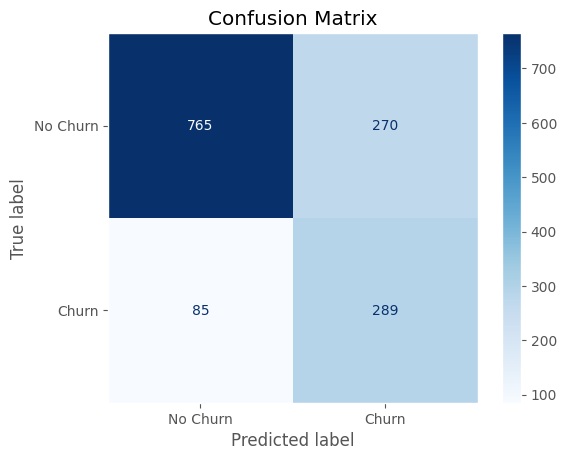

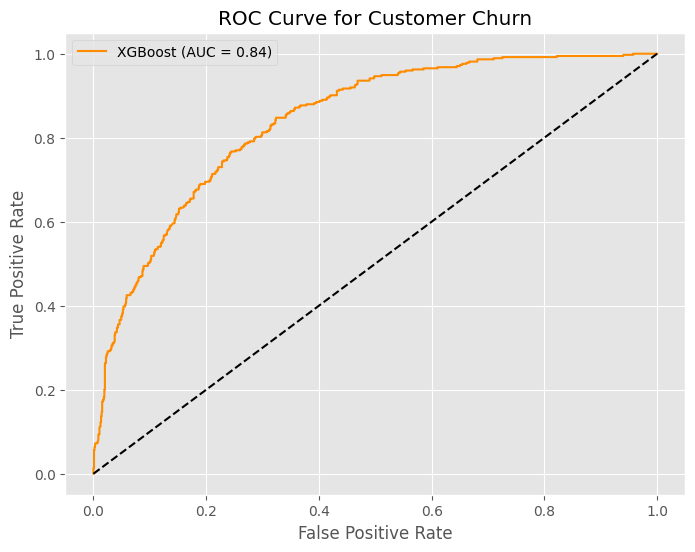

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Customer Churn')
plt.legend()
plt.show()

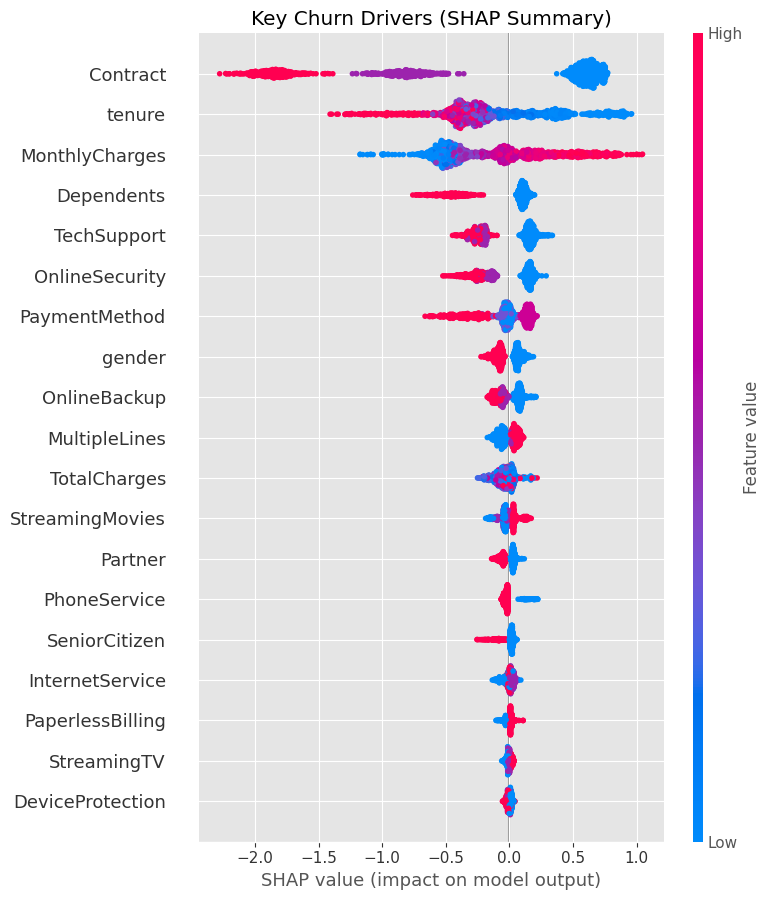

In [44]:
import shap

# Initialize the Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot (The famous SHAP beeswarm plot)
plt.title("Key Churn Drivers (SHAP Summary)")
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.show()